In [ ]:
# pip install -U scikit-learn
# https://scikit-learn.org/stable/datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn import datasets
import pandas as pd

# Data pull

In [19]:
diabetes = datasets.load_diabetes()

# Create a Pandas DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names) # importing feature matrix
diabetes_df['target'] = diabetes.target # importing target array

X1 = np.array(diabetes_df.age)
X2 = np.array(diabetes_df.sex)
X = np.c_[X1, X2]
Y = np.array(diabetes_df['target'])

# Gradient Descent Algorithm (Batch Linear Regression)

In [12]:

def gradDescentLinear(feat, targ, alpha, iterations):
    
    # input format: 
    
    # multiple linear regression for features x1, x2, .. , xn (each with m values):
    # feat = [[x1(1), x2(1), x3(1), ... xn(1)],
    #         [x1(2), x2(2), x3(2), ... xn(2)],
    #         [....., ....., ....., ... xn(m)]
    
    # simple linear regression for feature with m values:
    # feat = [x(1), x(2), x(3), ... x(m)]

    # target array with m values:
    # targ = [y(1), y(2), y(3), ... y(m)]

    # calculating cost function and derivatives
    def costLinear(m, n, w, featNorm, b, targ):
        cost = 0
        dw = np.zeros(n)
        db = 0
        
        for i in range(m):
            error = np.dot(w, feat[i]) + b - targ[i]
            cost += error ** 2
            dw += error * feat[i]
            db += error
            
        cost = cost / (2 * m)
        db = db / m
        dw = dw / m

        return cost, dw, db

    if feat.ndim == 1:
        feat = feat[:, np.newaxis]  # transposes array for simple linear regression

    
    m = len(targ) # length of each feature array
    n = feat.shape[1] # number of features

    # Normalize features for better convergence
    featNorm = np.zeros((m,n))
    featMean = np.mean(feat, axis=0)
    featStd = np.std(feat, axis=0)
    for i in range(m):
        for j in range(n):
            featNorm[i,j] = (feat[i,j] - featMean[j])/featStd[j]

    # intiializing variables
    w = np.zeros(n) 
    b = 0 
    
    #initializing lists
    costHistory = np.zeros(iterations)
    wHistory = np.zeros((iterations, n))
    bHistory = np.zeros(iterations)
    
    for i in range(iterations):
        cost, dw, db = costLinear(m, n, w, featNorm, b, targ)
        w -= alpha * dw
        b -= alpha * db
        wHistory[i,:] = w
        bHistory[i] = b
        costHistory[i] = cost
    
    return w, b, costHistory, wHistory, bHistory, featNorm

# Running the code

In [20]:
iterations = 100
alpha = 0.4
w, b, costHistory, wHistory, bHistory, XNorm = gradDescentLinear(X, Y, alpha, iterations)

# Visualizations:

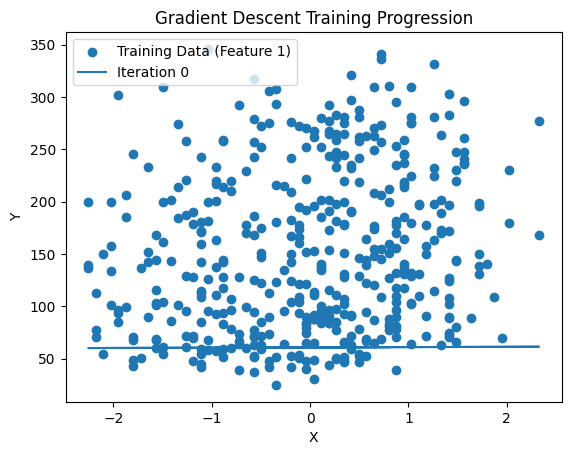

In [18]:
# WORKS FOR SINGLE VARIABLE REGRESSION RESULTS ONLY
# Create a scatter plot 
fig, ax = plt.subplots()
scatter = ax.scatter(XNorm, Y, label='Training Data (Feature 1)')

# Animate each iteration over scatter plot
def update(frame):
    ax.clear()  # Clear previous plot
    ax.scatter(XNorm, Y, label='Training Data (Feature 1)')
    
    # Plot the line for the current iteration
    ytest = XNorm * wHistory[frame] + bHistory[frame]
    ax.plot(XNorm, ytest, label=f'Iteration {frame}')
    ax.set_title('Gradient Descent Training Progression')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.legend()

animation = FuncAnimation(fig, update, frames=range(0, len(wHistory), 10), interval = 1000, repeat=False)

# Display the animation as HTML for use in Jupyter Notebook
html_anim = HTML(animation.to_jshtml())
html_anim

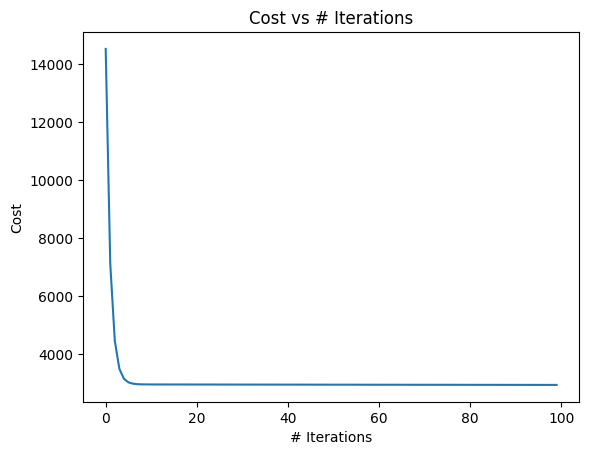

In [21]:
Jx = list(range(iterations))
plt.plot(Jx, costHistory)
plt.title('Cost vs # Iterations')
plt. xlabel('# Iterations')
plt.ylabel('Cost') 
plt.show()